In [267]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import math

<font size = 4 color = black face = "Times New Roman">Problem 2

<font size = 4 color = black face = "Times New Roman">We can get $F(k)$ by directly integrating the formula.  
$F(k)$ $=$ $1\over{\sqrt{2\pi}}$ $\int^{\infty}_{-\infty}{f(x)e^{-ikx}dx}$  
$=$ $1\over{\sqrt{2\pi}}$ $ ({4\over{\pi}})^{1\over{4}} $ $\int^{\infty}_{-\infty}{e^{-{{x^2}\over{2}}}e^{-ikx}dx}$  
$=$ $1\over{\sqrt{2\pi}}$ $ ({4\over{\pi}})^{1\over{4}} $ $e^{-{{k^2}\over{2}}}$ $\int^{\infty}_{-\infty}{e^{-{{1}\over{2}}(x-ik)^2}dx}$  
$=$ $ ({4\over{\pi}})^{1\over{4}} $ $e^{-{{k^2}\over{2}}}$

3.9586445320358505e-06


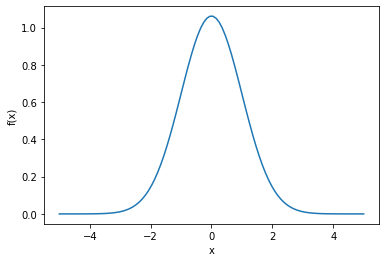

In [268]:
x = np.linspace(-5,5,100)
psi = (4/np.pi)**(1/4) * np.exp(-x**2/2)
plt.plot(x, psi)
plt.xlabel('x')
plt.ylabel('f(x)')
print(psi[-1])

<font size = 4 color = black face = "Times New Roman">We can see that $\psi(5)$ is small enough,  so I choose the region $(-5, 5)$.

In [269]:
def func(x):
    return (4/np.pi)**(1/4) * np.exp(-x**2/2)

def inv_func(k):
    return (4/np.pi)**(1/4) * np.exp(-k**2/2)

In [287]:
N = 101
x = np.linspace(-5, 5, N)
dx = 10 / N
kmax = np.pi / dx
k = np.linspace(-kmax, kmax, N)
dk = 2*kmax /N
psi = func(x)
phi = np.zeros(N, dtype=np.complex)
for i in range(N):
    phi[i] =  (dk / np.sqrt(2*np.pi)) * sum(psi*np.exp(-1j*k[i]*x)) 
phi = np.abs(phi)

Text(0, 0.5, 'F(k)')

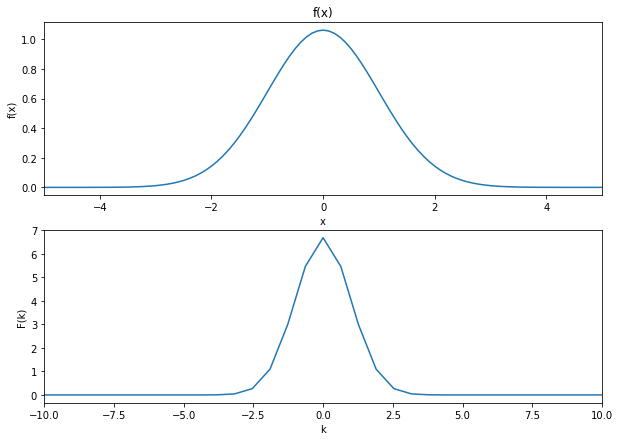

In [288]:
fig, ax = plt.subplots(2,1,figsize=(10,7))
ax[0].set_title('f(x)')
ax[0].plot(x,psi)
ax[0].set_xlim(-halfL,halfL)
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[1].plot(k[0:len(x)],np.abs(phi))
ax[1].set_xlim(-10,10)
ax[1].set_xlabel('k')
ax[1].set_ylabel('F(k)')

Text(0, 0.5, 'error')

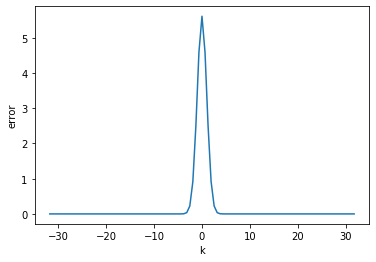

In [291]:
error = np.abs(inv_func(k) - phi)
plt.plot(k, error)
plt.xlabel('k')
plt.ylabel('error')

In [295]:
def error_max(N):
    x = np.linspace(-5, 5, N)
    dx = 10 / N
    kmax = np.pi / dx
    k = np.linspace(-kmax, kmax, N)
    dk = 2 * kmax /N
    psi = func(x)
    phi =  (dk / np.sqrt(2*np.pi)) * sum(psi*np.exp(-1j*0*x)) 
    phi = np.abs(phi)
    error = np.abs(phi - inv_func(0))
    return error

Text(0.5, 0, '$\\Delta x$')

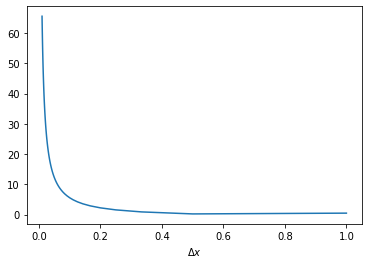

In [305]:
n = np.array([10*i for i in range(1, 101)])
h = 10/n
error = np.zeros(len(n))
for i in range(len(n)):
    error[i] = error_max(n[i])
plt.plot(h,error)
plt.xlabel('$\Delta x$')

<font size = 4 color = black face = "Times New Roman">Problem 5

<font size = 4 color = black face = "Times New Roman">$y'(x) = 1 + 2xy(x)$  
$y(0) = 0$  

In [201]:
def f(x, y):
    return 1 + 2*x*y

def f_real(x):
    return 1/2*(np.pi)**(1/2)*(np.exp(x**2))*(math.erf(x))

<font size = 4 color = black face = "Times New Roman">First I will define some functions to realize different method. This can help us calculate result with different step length easily. Here I directly use the religon (-1, 1) and the function defined above to make the codes more simple. We can fix it easily to calculate other religions or functions.

In [125]:
def rk2(N):
    x = np.linspace(0, 1, N)
    h = 1 / N
    y = np.zeros(len(x))
    for i in range(0, N-1):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h/2, y[i] + k1 / 2)
        y[i+1] = y[i] + k2
    return y

In [210]:
def rk4(N):
    x = np.linspace(0, 1 ,N)
    h = 1 / N
    y = np.zeros(len(x))
    for i in range(N - 1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + k1*h/2)
        k3 = f(x[i] + h/2, y[i] + k2*h/2)
        k4 = f(x[i] + h, y[i] + k3*h)
        y[i+1] = y[i] + (h / 6)*(k1 + 2*k2 + 2*k3 + k4)
    return y

In [151]:
def euler(N):
    x = np.linspace(0, 1, N)
    h = 1 / N
    y = np.zeros(len(x))
    for i in range(N - 1):
        y[i+1] = y[i] + h*f(x[i], y[i])
    return y

In [180]:
def leap_frog(N):  
    x = np.linspace(0, 1, N)
    h = 1 / N
    y = np.zeros(len(x))
    y[0] = 0
    y[1] = y[0] + h * f(x[0], y[0])
    for i in range(1, N - 1):
        y[i+1] = y[i-1] + 2*h*f(x[i], y[i])
    return y

In [166]:
def error_cal(N, function):  ## to calculate the error of different method
    x = np.linspace(0, 1, N)
    y_real = np.zeros(N)
    for i in range(len(x)):
        y_real[i] = 1/2*(np.pi)**(1/2)*(np.exp(x[i]**2))*(math.erf(x[i]))
    y_cal = function(N)
    error = sum((y_cal - y_real)**2)
    return error

<font size = 4 color = black face = "Times New Roman">(1)

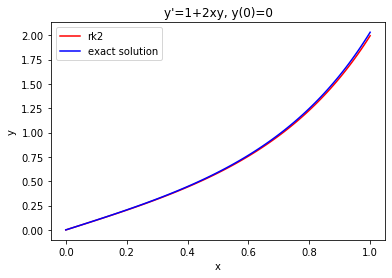

In [208]:
N = 100
y = rk2(N)
y_real = np.zeros(N)
x = np.linspace(0,1,N)
for i in range(len(x)):
    y_real[i] = f_real(x[i])
plt.plot(x, y, color = 'r', label = 'rk2')
plt.plot(x, y_real, color = 'b', label = 'exact solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("y'=1+2xy, y(0)=0")
plt.show()

<font size = 4 color = black face = "Times New Roman">(2)

In [211]:
##calculate the error
n = np.array([10 * i for i in range(1, 101)])
h = 1/n
error1 = np.zeros(len(h))
error2 = np.zeros(len(h))
error3 = np.zeros(len(h))
error4 = np.zeros(len(h))
for i in range(len(n)):
    error1[i] = error_cal(n[i], rk2)
    error2[i] = error_cal(n[i], euler)
    error3[i] = error_cal(n[i], leap_frog)
    error4[i] = error_cal(n[i], rk4)

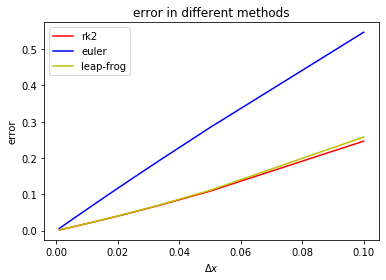

In [212]:
## draw the picture
plt.plot(h, error1, color = 'r', label = 'rk2')
plt.plot(h, error2, color = 'b', label = 'euler')
plt.plot(h, error3, color = 'y', label = 'leap-frog')
plt.title('error in different methods')
plt.xlabel('$\Delta$$x$')
plt.ylabel('error')
plt.legend()
plt.show()

<font size = 4 color = black face = "Times New Roman">Here we can see that euler method is the worst method. When $\Delta x$is big, the rk2 method is the better method. When $\Delta x$ is small enough, the difference between rk2 and leap-frog is not obvious. 

<font size = 4 color = black face = "Times New Roman">(3)

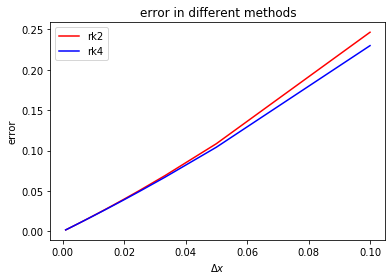

In [214]:
plt.plot(h, error1, color = 'r', label = 'rk2')
plt.plot(h, error4, color = 'b', label = 'rk4')
plt.title('error in different methods')
plt.xlabel('$\Delta$$x$')
plt.ylabel('error')
plt.legend()
plt.show()

<font size = 4 color = black face = "Times New Roman">Easy to find, the error of rk4 is smaller than rk2.